Re-reading files using sitk to begin plotting histograms

In [2]:
import SimpleITK as sitk

In [3]:
# patient 216
test_subject = 'S216'
image_16 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/{test_subject.lower()}_T2.nii.gz')
mask_L5S1 = sitk.ReadImage('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/S216/vois/L5S1_pred.nii')
mask_L1L2 = sitk.ReadImage('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/S216/vois/L1L2_pred.nii')
mask_L2L3 = sitk.ReadImage('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/S216/vois/L2L3_pred.nii')
mask_L3L4 = sitk.ReadImage('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/S216/vois/L3L4_pred.nii')
mask_L4L5 = sitk.ReadImage('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/S216/vois/L4L5_pred.nii')

mask_ls_16 = [mask_L5S1,mask_L1L2,mask_L2L3,mask_L3L4,mask_L4L5]


# patient 204 
test_subject = 'S204'
image_4 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/{test_subject.lower()}_T2.nii.gz')
mask_L5S1 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/vois/L5S1_pred.nii')
mask_L1L2 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/vois/L1L2_pred.nii')
mask_L2L3 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/vois/L2L3_pred.nii')
mask_L3L4 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/vois/L3L4_pred.nii')
mask_L4L5 = sitk.ReadImage(f'/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/{test_subject}/vois/L4L5_pred.nii')

mask_ls_4 = [mask_L5S1,mask_L1L2,mask_L2L3,mask_L3L4,mask_L4L5]

In [4]:
import pandas as pd
spine_data_labels = pd.read_csv('/Users/bukowskin/Documents/school_repos/data_practicum/spine_segment_2023/Spine_data.csv')
spine_data_labels

Subject number     DHI  Pfirrman_degeneration_score
0                 200  0.349                          2.0
1                 200  0.362                          3.0
2                 200  0.321                          3.0
3                 200  0.411                          3.0
4                 200  0.416                          2.0
..                ...    ...                          ...
305               297  0.291                          4.0
306               297  0.388                          4.0
307               297  0.440                          3.0
308               297  0.479                          2.0
309               297  0.405                          2.0

[310 rows x 3 columns]

In [5]:
patient_216 = spine_data_labels[spine_data_labels[' Subject number '] == 216]
patient_216 = list(patient_216['Pfirrman_degeneration_score'])

patient_204 = spine_data_labels[spine_data_labels[' Subject number '] == 204]
patient_204 = list(patient_204['Pfirrman_degeneration_score']) # changed to list to iterate easily during plotting

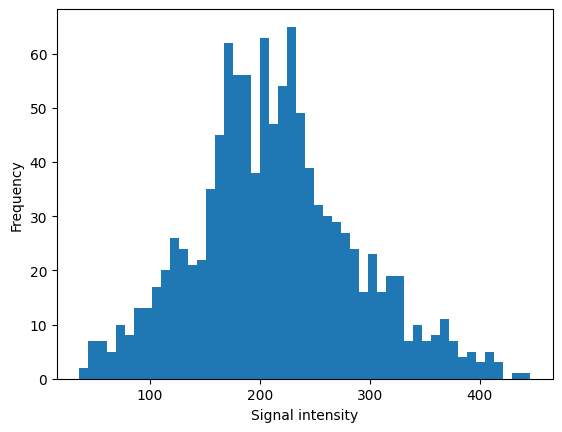

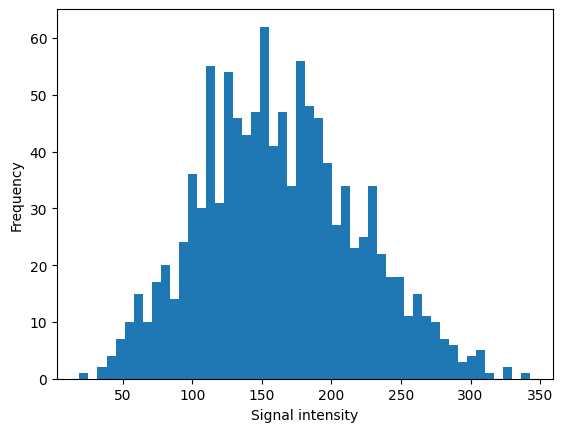

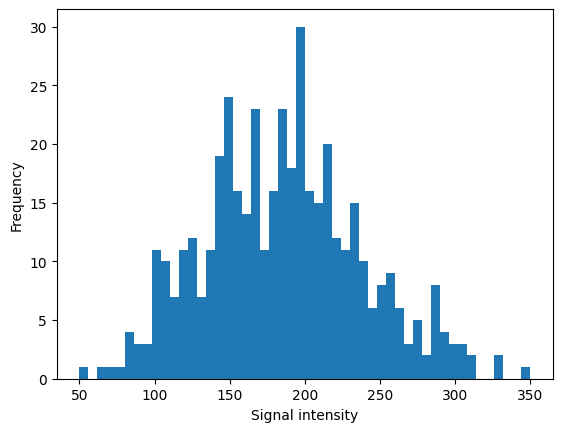

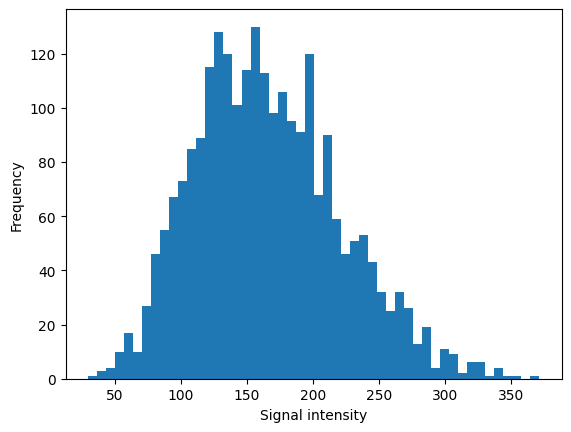

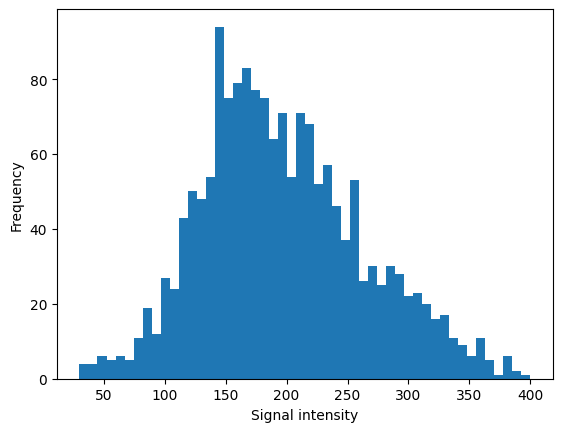

In [6]:
import numpy as np
import matplotlib.pyplot as plt


for mask in mask_ls_16:
    # Get the numpy arrays of the image and mask
    image_array = sitk.GetArrayFromImage(image_16)
    mask_array = sitk.GetArrayFromImage(mask)

    # Apply the mask to the image
    masked_image_array = np.ma.masked_array(image_array[7:10,:,:], np.logical_not(mask_array[7:10,:,:]))

    # Get the signal intensity values within the ROI
    signal_intensities = masked_image_array.compressed()

    # Plot a histogram of the signal intensity values
    fig, ax = plt.subplots()
    ax.hist(signal_intensities, bins=50)
    ax.set_xlabel('Signal intensity')
    ax.set_ylabel('Frequency')
    plt.show()


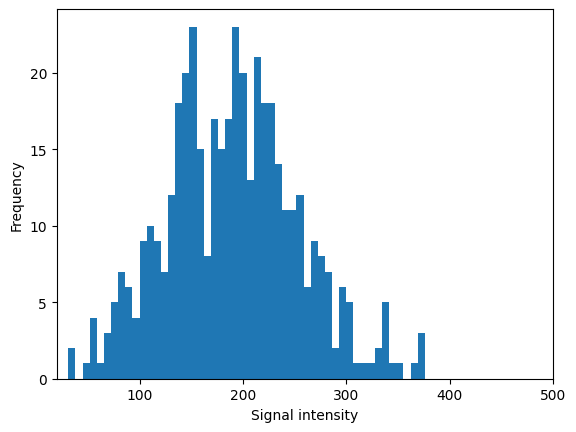

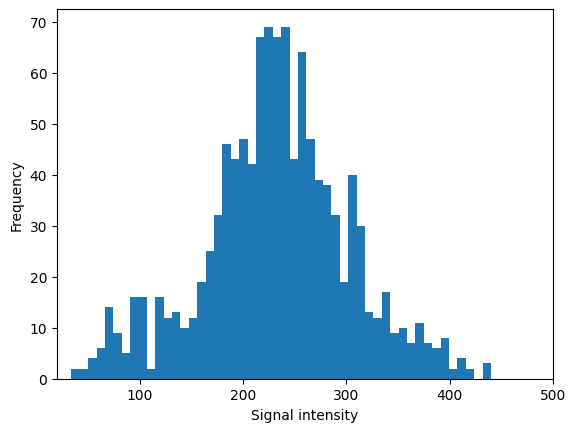

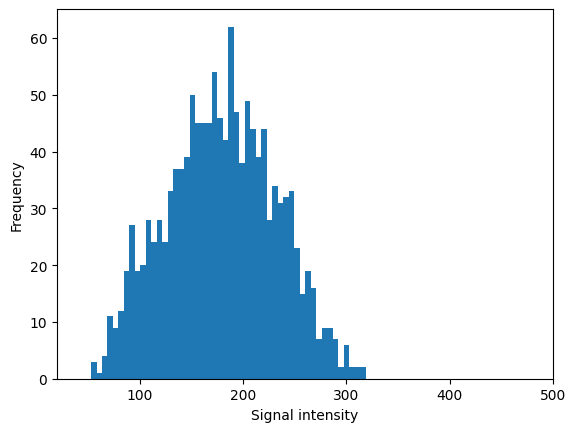

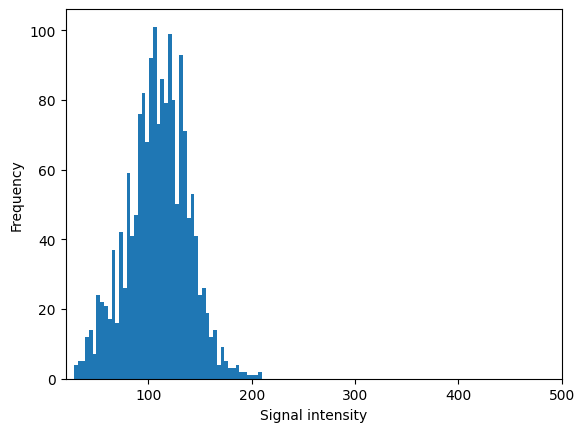

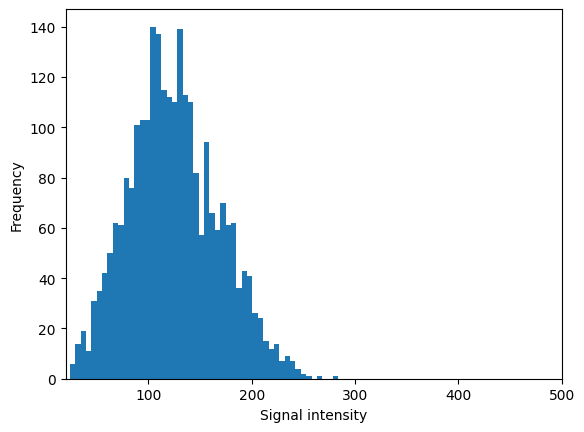

In [7]:
for mask in mask_ls_4:
    # Get the numpy arrays of the image and mask
    image_array = sitk.GetArrayFromImage(image_4)
    mask_array = sitk.GetArrayFromImage(mask)

    # Apply the mask to the image
    masked_image_array = np.ma.masked_array(image_array[7:10,:,:], np.logical_not(mask_array[7:10,:,:]))

    # Get the signal intensity values within the ROI
    signal_intensities = masked_image_array.compressed()

    # Plot a histogram of the signal intensity values
    fig, ax = plt.subplots()
    ax.hist(signal_intensities, bins=50)
    ax.set(xlim=(20,500))
    ax.set_xlabel('Signal intensity')
    ax.set_ylabel('Frequency')
    plt.show()

Comparing patient disc to eachother

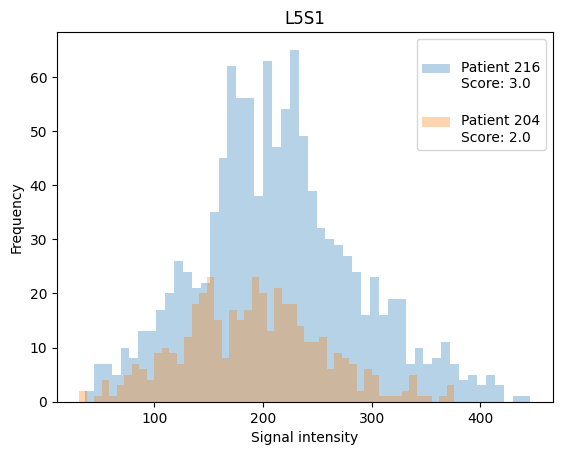

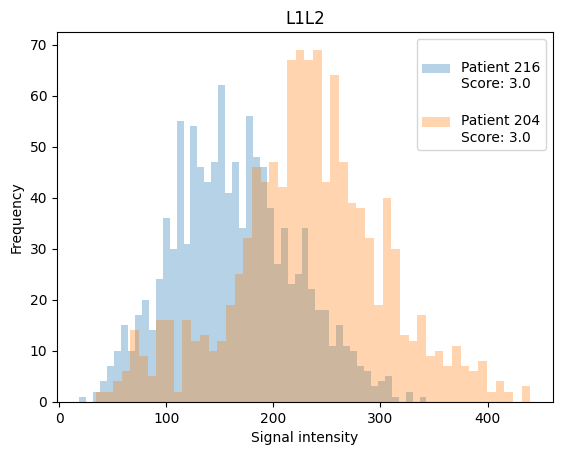

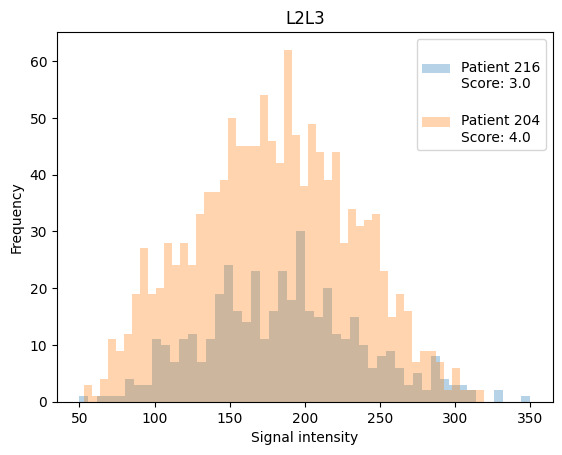

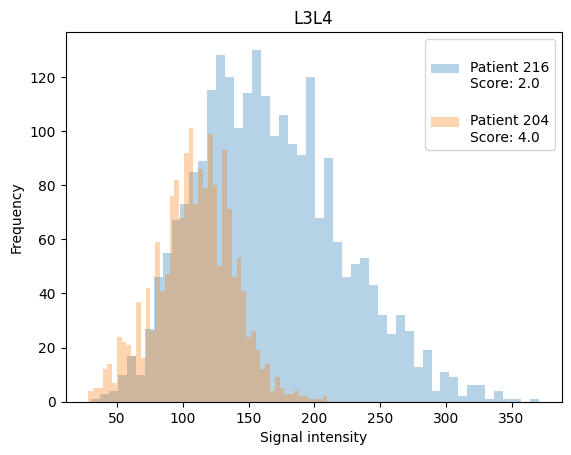

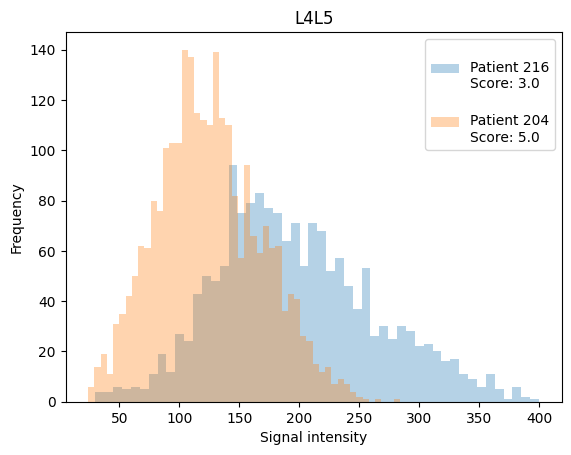

In [8]:
labels = ['L5S1','L1L2','L2L3','L3L4','L4L5']
ugh = ['o','p']
for mask16,mask4,label,p16,p4 in zip(mask_ls_16,mask_ls_4,labels,patient_216,patient_204):

    #----------------------------------------------------------------
    # Patient 216 - degneration
    # Get the numpy arrays of the image and mask
    image_array = sitk.GetArrayFromImage(image_16)
    mask_array = sitk.GetArrayFromImage(mask16)
    # Apply the mask to the image
    masked_image_array = np.ma.masked_array(image_array[7:10,:,:], np.logical_not(mask_array[7:10,:,:]))
    # Get the signal intensity values within the ROI
    signal_intensities16 = masked_image_array.compressed()

    #-----------------------------------------------------------------
    # Patient 204 - healthy
    image_array = sitk.GetArrayFromImage(image_4)
    mask_array = sitk.GetArrayFromImage(mask4)
    # Apply the mask to the image
    masked_image_array = np.ma.masked_array(image_array[7:10,:,:], np.logical_not(mask_array[7:10,:,:]))
    # Get the signal intensity values within the ROI
    signal_intensities4 = masked_image_array.compressed()

    #-----------------------------------------------------------------
    # Plot a histogram of the signal intensity values
    fig, ax = plt.subplots()
    ax.hist(signal_intensities16, bins=50,alpha=0.33,label=f'\nPatient 216\nScore: {p16}')
    ax.hist(signal_intensities4,bins = 50,alpha=0.33,label =f'\nPatient 204\nScore: {p4}')
    ax.set_xlabel('Signal intensity')
    ax.set_title(f'{label}')
    ax.legend()
    ax.set_ylabel('Frequency')
    plt.show()
